In [81]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [82]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [83]:
datestring = '201703'
getCitiBikeCSV(datestring)

file in place, you can continue


# IDEA: Women spend less time biking per trip than men do.

## Null Hypothesis: 
## The trip duration of women bikers is longer than or equal to that of men bikers during March 2017.
## Alternative Hypothesis:
## The trip duration of women bikers is shorter than that of men bikers during March 2017.
### _$H_0$_:  $W_{\mathrm{t}}>= M_{\mathrm{t}}$
### _$H_1$_ : $W_{\mathrm{t}}< M_{\mathrm{t}}$
### significance level  $\alpha=0.05$

In [93]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['Trip Duration'] or as attributes: df.Trip Duration. 
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1076,2017-03-01 00:03:02,2017-03-01 00:20:58,3275,Columbus Drive,40.718355,-74.038914,3207,Oakland Ave,40.737604,-74.052478,26283,Subscriber,1991.0,1
1,978,2017-03-01 00:09:02,2017-03-01 00:25:20,3220,5 Corners Library,40.734961,-74.059503,3195,Sip Ave,40.730743,-74.063784,24559,Subscriber,1987.0,1
2,1789,2017-03-01 00:28:11,2017-03-01 00:58:00,3195,Sip Ave,40.730743,-74.063784,3186,Grove St PATH,40.719586,-74.043117,24559,Subscriber,1987.0,1
3,613,2017-03-01 00:52:30,2017-03-01 01:02:44,3194,McGinley Square,40.725340,-74.067622,3189,West Side Light Rail,40.714402,-74.088772,26261,Subscriber,1962.0,1
4,2418,2017-03-01 00:54:40,2017-03-01 01:34:59,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,26277,Subscriber,1975.0,1


In [94]:
df.columns

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender'],
      dtype='object')

In [95]:
df.drop([u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year'], axis=1, inplace=True)

In [96]:
df.head()

,Trip Duration,Gender
0,1076,1
1,978,1
2,1789,1
3,613,1
4,2418,1


### Lets separate males (_m) from females (_w) to test the hypotheses.
### In this csv file gender == 1 is male, gender == 2 is female
### Lets plot the sum of trip duration time for each gender type

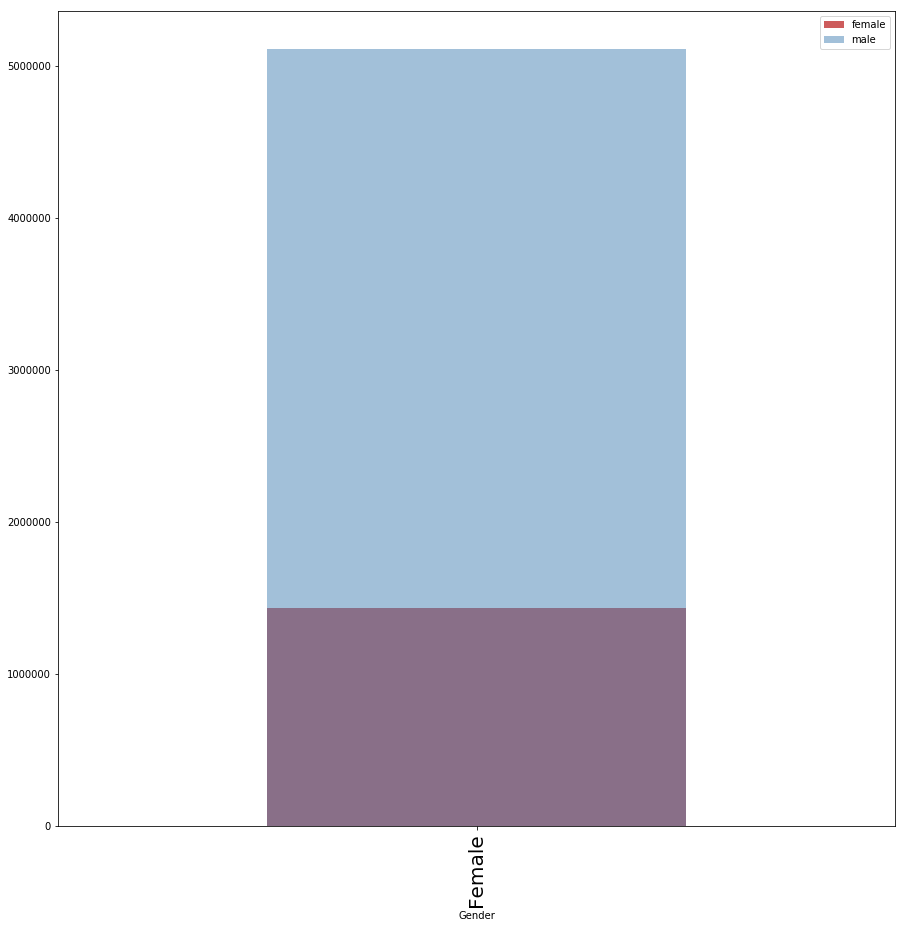

In [102]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['Trip Duration'][df['Gender'] == 2].groupby([df['Gender'] == 2]).sum()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((df['Trip Duration'][df['Gender'] == 1].groupby([df['Gender'] == 1]).sum()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')
tmp = ax.xaxis.set_ticklabels(['Female', 'Male'], fontsize=20)
pl.legend()

Figure 1a: Duration of Trips of Citibike bikers by gender in March 2017, absolute sums

In [125]:
#Count the number of rides for each gender that either exceed the trip duration mean time or not. 
#Because I can't plot error bars using the sum method above...
duration_mean = df['Trip Duration'].mean()

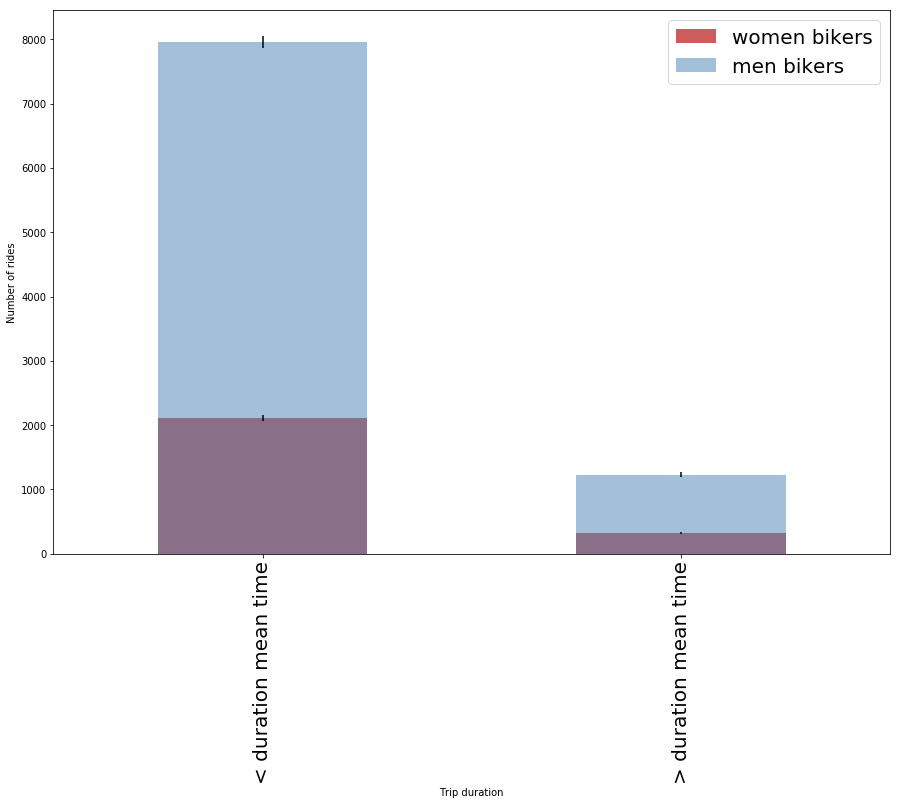

In [132]:
fig=pl.figure(figsize(15,10))

count_w = df['Trip Duration'][df['Gender'] == 2].groupby([df['Trip Duration'] > duration_mean]).count()
norm_w = 1
error_w = np.sqrt(count_w)
ax=((count_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


count_m = df['Trip Duration'][df['Gender'] == 1].groupby([df['Trip Duration'] > duration_mean]).count()
norm_m = 1
error_m = np.sqrt(count_m)
((count_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], color='SteelBlue', label='men bikers')
ax.xaxis.set_ticklabels(['< duration mean time','> duration mean time'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Trip duration")
pl.legend(['women bikers','men bikers'],fontsize=20)

Figure 1b: Distributions of Trip Durations of Citibike bikers by gender in March 2017, absolute counts, with statistical errors

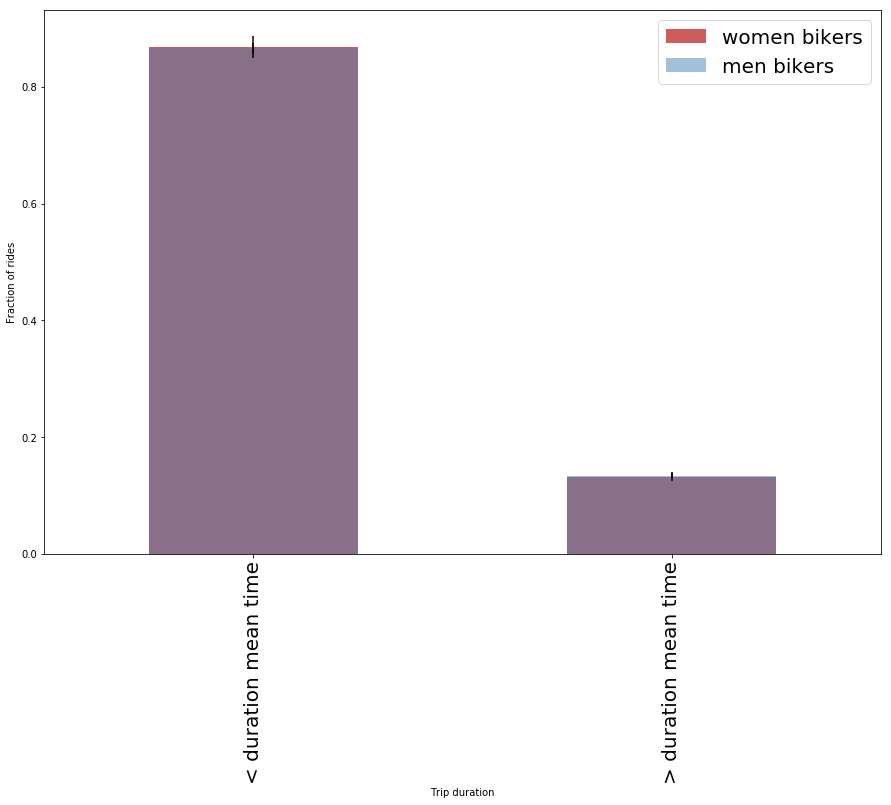

In [135]:
fig = pl.figure(figsize(15,10))

norm_w = count_w.sum()
error_w = np.sqrt(count_w)
((count_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = count_m.sum()
error_m = np.sqrt(count_m)
ax = ((count_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.xaxis.set_ticklabels(['< duration mean time','> duration mean time'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Trip duration")

pl.legend(['women bikers','men bikers'],fontsize=20)

Figure 2:  Distributions of Trip Durations of Citibike bikers by gender in March 2017, normalized